In [ ]:
# LIBRARIES #
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
import sklearn
import sklearn.metrics  as metrics
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [ ]:
# READ CSV #
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/student-por.csv', sep=",")

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
# FIRST APPROACH TO THE DATASET #

# columns names #
data_names = ['school', 'sex', 'age', 'address', 'family_size', 'parent_cohabition_status', 'mother_education', 'father_education','mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade' ]
data.columns = data_names

# numerical vs categorical columns #
numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1','grade_period2', 'final_grade']
categorical_columns = ["school","sex",'address', 'family_size', 'parent_cohabition_status','mother_job', 'father_job', 'reason', 'guardian',"school_support", "family_support",'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic']


In [ ]:
# CLEAN THE DATABASE # 

# 3. Get the dummies so that it is easier to work. 
# This is, transform the categorical columns into numerical ones. 
data_clean = pd.get_dummies(data, columns=categorical_columns)

# 4. Transform the data. 
# we need to standarize the data to take into consideration variations in measurments, units and scales. 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])
scaled_dataframe = pd.DataFrame(scaled_data, columns = numerical_columns)  
scaled_dataframe.head()

for column in numerical_columns:
  data_clean.append(scaled_dataframe[column])
  data_clean[column] = scaled_dataframe[column]

In [ ]:
# LINEAR REGRESSION #

# 1. Split into training, testing and validation data.
boolean_mask = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1', 'grade_period2', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[boolean_mask]
X=data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True) # 0.25 x 0.8 = 0.2, validation set is 20% of training set

# 2. Fit the model, get the prediction and get the accuracy.
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear regression:")

y_pred = linear_model.predict(X_val)

print("Accuracy:", linear_model.score(X_val,y_val))   # linear_model.score uses R-squared metric by default

mse_tot = mean_squared_error(y_val, y_val)  

print("Mean squared error: %.10f" % mse_tot)  

# 3. Get the coefficients of the regression model:
coefficient={}
for feat in X_train.columns:
  coefficient[feat]=linear_model.coef_

# print(coefficient["traveltime"])


Linear regression:
Accuracy: 0.9152895804364491
Mean squared error: 0.0000000000


In [ ]:
# TESTING ON UNSEEN DATA #

y_pred_new = linear_model.predict(X_test)

print("Accuracy:", linear_model.score(X_test,y_test))   # linear_model.score uses R-squared metric by default

mse_tot = mean_squared_error(y_test, y_test)  

print("Mean squared error: %.10f" % mse_tot)  

Accuracy: 0.8446513887048444
Mean squared error: 0.0000000000


Coefficients are: b = [4.25453536e+11] and m = [[ 1.53447461e-02 -3.57499733e-02  2.09077675e-02  4.39466394e-02
  -7.28211025e-03 -6.67463683e-02  1.66121335e-02 -3.37110621e-02
  -7.99834504e-03  5.99885964e-03 -3.71768575e-02 -5.46298858e-02
   2.80406199e-02  1.28112029e-01  7.49039827e-01  1.17067264e+11
   1.17067264e+11 -3.79730041e+08 -3.79730041e+08 -1.82520268e+11
  -1.82520268e+11 -3.65326563e+10 -3.65326563e+10  2.20485904e+11
   2.20485904e+11  1.59617501e+11  1.59617501e+11  1.59617501e+11
   1.59617501e+11  1.59617501e+11 -1.25591404e+11 -1.25591404e+11
  -1.25591404e+11 -1.25591404e+11 -1.25591404e+11 -5.03532126e+10
  -5.03532126e+10 -5.03532126e+10 -5.03532126e+10 -5.27246934e+11
  -5.27246934e+11 -5.27246934e+11 -6.08059846e-02  2.15461906e-02
  -2.65824080e-03  5.97336886e-03 -6.51510070e-02  8.17238943e-02
   4.24500008e-03 -3.67526320e-02]]


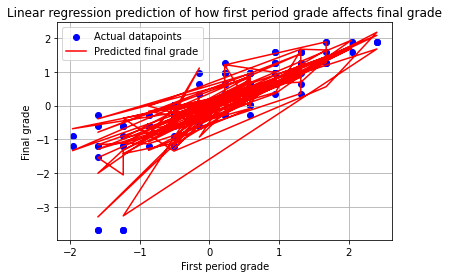

In [ ]:
coef = coefficient["grade_period1"]

print('Coefficients are: b =', linear_model.intercept_, "and m =", coef)

plt.scatter(X_test["grade_period1"], y_test, color="blue", label="Actual datapoints")    # The actual data 

plt.plot(X_test["grade_period1"], y_pred_new, color="red", label="Predicted final grade")   # The predicted relationship

plt.title("Linear regression prediction of how first period grade affects final grade")

plt.xlabel("First period grade")
plt.ylabel("Final grade")

plt.legend()

plt.grid(); plt.show()

Coefficients are: b = [4.25453536e+11] and m = [[ 1.53447461e-02 -3.57499733e-02  2.09077675e-02  4.39466394e-02
  -7.28211025e-03 -6.67463683e-02  1.66121335e-02 -3.37110621e-02
  -7.99834504e-03  5.99885964e-03 -3.71768575e-02 -5.46298858e-02
   2.80406199e-02  1.28112029e-01  7.49039827e-01  1.17067264e+11
   1.17067264e+11 -3.79730041e+08 -3.79730041e+08 -1.82520268e+11
  -1.82520268e+11 -3.65326563e+10 -3.65326563e+10  2.20485904e+11
   2.20485904e+11  1.59617501e+11  1.59617501e+11  1.59617501e+11
   1.59617501e+11  1.59617501e+11 -1.25591404e+11 -1.25591404e+11
  -1.25591404e+11 -1.25591404e+11 -1.25591404e+11 -5.03532126e+10
  -5.03532126e+10 -5.03532126e+10 -5.03532126e+10 -5.27246934e+11
  -5.27246934e+11 -5.27246934e+11 -6.08059846e-02  2.15461906e-02
  -2.65824080e-03  5.97336886e-03 -6.51510070e-02  8.17238943e-02
   4.24500008e-03 -3.67526320e-02]]


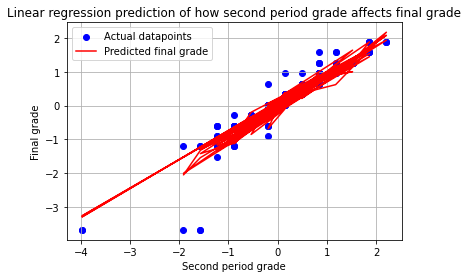

In [ ]:
# PLOTTING THE PREDICTION #

coef = coefficient["grade_period2"]

print('Coefficients are: b =', linear_model.intercept_, "and m =", coef)

plt.scatter(X_test["grade_period2"], y_test, color="blue", label="Actual datapoints")    # The actual data 

plt.plot(X_test["grade_period2"], y_pred_new, color="red", label="Predicted final grade")   # The predicted relationship

plt.title("Linear regression prediction of how second period grade affects final grade")

plt.xlabel("Second period grade")
plt.ylabel("Final grade")

plt.legend()

plt.grid(); plt.show()

Coefficients are: b = [4.25453536e+11] and m = [[ 1.53447461e-02 -3.57499733e-02  2.09077675e-02  4.39466394e-02
  -7.28211025e-03 -6.67463683e-02  1.66121335e-02 -3.37110621e-02
  -7.99834504e-03  5.99885964e-03 -3.71768575e-02 -5.46298858e-02
   2.80406199e-02  1.28112029e-01  7.49039827e-01  1.17067264e+11
   1.17067264e+11 -3.79730041e+08 -3.79730041e+08 -1.82520268e+11
  -1.82520268e+11 -3.65326563e+10 -3.65326563e+10  2.20485904e+11
   2.20485904e+11  1.59617501e+11  1.59617501e+11  1.59617501e+11
   1.59617501e+11  1.59617501e+11 -1.25591404e+11 -1.25591404e+11
  -1.25591404e+11 -1.25591404e+11 -1.25591404e+11 -5.03532126e+10
  -5.03532126e+10 -5.03532126e+10 -5.03532126e+10 -5.27246934e+11
  -5.27246934e+11 -5.27246934e+11 -6.08059846e-02  2.15461906e-02
  -2.65824080e-03  5.97336886e-03 -6.51510070e-02  8.17238943e-02
   4.24500008e-03 -3.67526320e-02]]


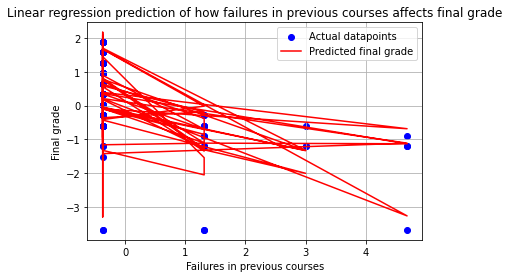

In [ ]:
coef = coefficient["failures"]

print('Coefficients are: b =', linear_model.intercept_, "and m =", coef)

plt.scatter(X_test["failures"], y_test, color="blue", label="Actual datapoints")

plt.plot(X_test["failures"], y_pred_new, color="red", label="Predicted final grade")

plt.title("Linear regression prediction of how failures in previous courses affects final grade")

plt.xlabel("Failures in previous courses")
plt.ylabel("Final grade")

plt.legend()

plt.grid(); plt.show()

Coefficients are: b = [4.25453536e+11] and m = [[ 1.53447461e-02 -3.57499733e-02  2.09077675e-02  4.39466394e-02
  -7.28211025e-03 -6.67463683e-02  1.66121335e-02 -3.37110621e-02
  -7.99834504e-03  5.99885964e-03 -3.71768575e-02 -5.46298858e-02
   2.80406199e-02  1.28112029e-01  7.49039827e-01  1.17067264e+11
   1.17067264e+11 -3.79730041e+08 -3.79730041e+08 -1.82520268e+11
  -1.82520268e+11 -3.65326563e+10 -3.65326563e+10  2.20485904e+11
   2.20485904e+11  1.59617501e+11  1.59617501e+11  1.59617501e+11
   1.59617501e+11  1.59617501e+11 -1.25591404e+11 -1.25591404e+11
  -1.25591404e+11 -1.25591404e+11 -1.25591404e+11 -5.03532126e+10
  -5.03532126e+10 -5.03532126e+10 -5.03532126e+10 -5.27246934e+11
  -5.27246934e+11 -5.27246934e+11 -6.08059846e-02  2.15461906e-02
  -2.65824080e-03  5.97336886e-03 -6.51510070e-02  8.17238943e-02
   4.24500008e-03 -3.67526320e-02]]


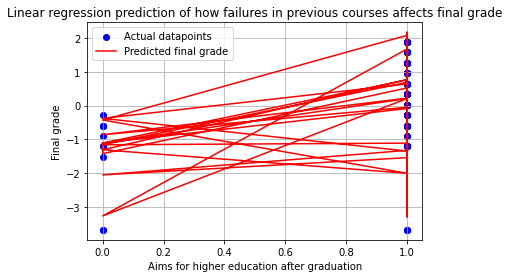

In [ ]:
coef = coefficient["higher_yes"]

print('Coefficients are: b =', linear_model.intercept_, "and m =", coef)

plt.scatter(X_test["higher_yes"], y_test, color="blue", label="Actual datapoints")

plt.plot(X_test["higher_yes"], y_pred_new, color="red", label="Predicted final grade")

plt.title("Linear regression prediction of how failures in previous courses affects final grade")

plt.xlabel("Aims for higher education after graduation")
plt.ylabel("Final grade")

plt.legend()

plt.grid(); plt.show()

As we can see above, the prediction of the linear regression model suits the datapoints best for feature 'grade_period_2'. There is a positive correlation between the datapoints of the first period grade and the final grade and a negative correlation between number of failures in previous courses and final grade.

In [ ]:
# RESCALING THE DATA #

# Now we want to examine what the predicted grade values actually is, in the shape and form they originally have in the dataset. 

y_pred_rescaled = y_pred * data["final_grade"].std() + data["final_grade"].mean()
# print(y_pred_rescaled)   # these are the predicted grades in their original form
print("\n", "Mean of predicted grades:", y_pred_rescaled.mean())

# Our model predicts a slightly higher mean of the grades than in database. 


 Mean of predicted grades: 11.849062618837387


In [ ]:
# Creates a function to determine which will be the best alpha value for Lasso regression in following cell.
alphas = np.arange(0,1,0.001).tolist()
def best_alpha(X, y, alpha_values=alphas):
    """
    Here we can test which the best alpha value is, using cross-validation for Lasso model.

    X is a feature matrix and y is a target vector. We will test all alpha values in the list of alpha values.
    """
    
    lasso = LassoCV(alphas=alpha_values, cv=5, random_state=42)
    lasso.fit(X, y)
    
    best_alpha = lasso.alpha_
    
    return best_alpha

In [ ]:
# LASSO REGRESSION #

# 1. Split into training and testing data.
boolean_mask = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1', 'grade_period2', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])

sc = data_clean.columns[boolean_mask]
X=data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

# 2. Fit the model and get the accuracy.
best_alpha_for_lasso = best_alpha(X_train, y_train)
print("The alpha value we will use is:", best_alpha_for_lasso)
lasso_model=Lasso(alpha=best_alpha_for_lasso)
lasso_model.fit(X_train, y_train)

# 3. Make the predictions, first on the validation set to measure suitability of the model.
y_pred = lasso_model.predict(X_val)


# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_val,y_pred)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_val,y_val)

print("R2:",r2)


# 6. Get Lasso coefficients and select a few features to improve the model accuracy
sel = SelectFromModel(lasso_model)
removed_features = X_train.columns[(sel.estimator.coef_ == 0).ravel().tolist()]
chosen_features = X_train.columns[(sel.estimator.coef_ != 0).ravel().tolist()]

print("\n", chosen_features)


The alpha value we will use is: 0.035
Slope 0.0
Intercept: [0.00070773]


Mean squared error: 0.1351863031894642
R2: 0.8837642399151437

 Index(['failures', 'workday_alcohol', 'grade_period1', 'grade_period2'], dtype='object')


In [ ]:
# LASSO REGRESSION AFTER FEATURE SELECTION #

boolean_mask = data_clean.columns.isin(chosen_features.tolist())
sc = data_clean.columns[boolean_mask]
X=data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

# 2. Fit the model and get the accuracy.
# best_alpha_for_lasso = best_alpha(X_train, y_train)
# print("The alpha value we will use is:", best_alpha_for_lasso)
lasso_model=Lasso(alpha=best_alpha_for_lasso)
lasso_model.fit(X_train, y_train)

# 3. Make the predictions on the validation set.
y_pred = lasso_model.predict(X_val)

# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_val,y_val)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_val,y_val)
print("R2:",r2)


Slope -0.032899039112842456
Intercept: [0.00458896]


Mean squared error: 0.0
R2: 0.8666625281260331


In [ ]:
# Now that we are happy with the model, we test the actual accuracies on the test set

y_pred_new = lasso_model.predict(X_test)

mse = mean_squared_error(y_test,y_test)
print("Mean squared error:", mse)

r2=lasso_model.score(X_test,y_test)
print("R2:",r2)

Mean squared error: 0.0
R2: 0.8205487336091275


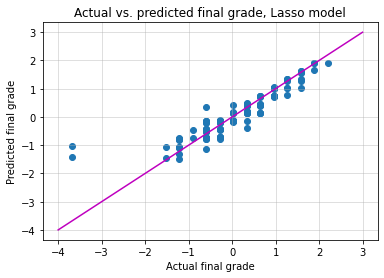

In [ ]:
x = np.arange(-4, 4, 1)
plt.scatter(y_test, y_pred_new)
plt.xlabel("Actual final grade")
plt.ylabel("Predicted final grade")
plt.plot(x, x, color='m')
plt.title("Actual vs. predicted final grade, Lasso model")
plt.grid(alpha=0.5); plt.show()

In [ ]:
y_pred_rescaled = y_pred * data["final_grade"].std() + data["final_grade"].mean()
# print(y_pred_rescaled)   # these are the predicted grades in their original form
print("\n", "Mean of predicted grades:", y_pred_rescaled.mean())


 Mean of predicted grades: 11.964975400232905


We can see that, so far, we get an accuracy of the linear regression model of approximately 0.796 (79.6%). 

The Lasso regression model gets an accuracy of approximately 0.858 (85.8%), but after feature selection it gets an accuracy of approximately 0.867 (86.7%).

All of these results differs for every run since the data is splitted randomly with shuffle = True. 

One thing that is important to note is that two of the features that affects these results the most are 'grade_period1' and 'grade_period2', which are also measures of grades. These have, as we can see, a very high correlation with the final grade. 

We should try just how much the current accuracy depends on these by removing them from the data.

In [ ]:
# CLEAN THE DATABASE # 

# 1. Drop the columns that we are not going to use.
data_clean = data.drop(['grade_period1', 'grade_period2'], axis=1)
numerical_columns_new = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'final_grade']

In [ ]:
# CLEAN THE DATABASE # 

# 3. Get the dummies so that it is easier to work. 
# This is, transform the categorical columns into numerical ones. 
data_clean = pd.get_dummies(data_clean, columns=categorical_columns)

# 4. Transform the data. 
# we need to standarize the data to take into consideration variations in measurments, units and scales. 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns_new])
scaled_dataframe = pd.DataFrame(scaled_data, columns = numerical_columns_new)  
scaled_dataframe.head()

for column in numerical_columns_new:
  data_clean.append(scaled_dataframe[column])
  data_clean[column] = scaled_dataframe[column]

In [ ]:
# LASSO REGRESSION #

# 1. Split into training and testing data.
boolean_mask = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[boolean_mask]
X=data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 2. Fit the model and get the accuracy.
best_alpha_for_lasso = best_alpha(X_train, y_train)
print("The alpha value we will use is:", best_alpha_for_lasso)
lasso_model=Lasso(alpha=best_alpha_for_lasso)
lasso_model.fit(X_train, y_train)

# 3. Make the predictions.
y_pred = lasso_model.predict(X_test)


# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_test,y_test)

print("R2:",r2)


# 6. Get Lasso coefficients and select a few features to improve the model accuracy
sel = SelectFromModel(lasso_model)
removed_features = X_train.columns[(sel.estimator.coef_ == 0).ravel().tolist()]
chosen_features = X_train.columns[(sel.estimator.coef_ != 0).ravel().tolist()]

print("\n", chosen_features)


The alpha value we will use is: 0.014
Slope 0.05108898349621459
Intercept: [-0.53259157]


Mean squared error: 0.8557813608442372
R2: 0.2600901054296514

 Index(['age', 'mother_education', 'father_education', 'studytime', 'failures',
       'famrel', 'freetime', 'workday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'school_GP', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'mother_job_health', 'father_job_services', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'school_support_yes', 'extra_curricular_activities_yes', 'higher_yes',
       'internet_access_yes', 'romantic_yes'],
      dtype='object')


In [ ]:
# LASSO REGRESSION AFTER FEATURE SELECTION #

boolean_mask = data_clean.columns.isin(chosen_features.tolist())
sc = data_clean.columns[boolean_mask]
X=data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 2. Fit the model and get the accuracy.
# best_alpha_for_lasso = best_alpha(X_train, y_train)
# print("The alpha value we will use is:", best_alpha_for_lasso)
lasso_model=Lasso(alpha=best_alpha_for_lasso)
lasso_model.fit(X_train, y_train)

# 3. Make the predictions.
y_pred = lasso_model.predict(X_test)

# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_test,y_test)
print("R2:",r2)

Slope 0.034303202820271037
Intercept: [-0.52994385]


Mean squared error: 0.623126681865906
R2: 0.34747383600780546


As we suspected, the accuracy gets much worse when these features are removed.